In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Reading the csv file

In [2]:
gp_df = pd.read_csv('GP Orders - 5.csv', parse_dates=['Order Date & Time'])
print("Data shape is : ", gp_df.shape)
print("Columns : ", gp_df.columns, "\n")
gp_df.head()

Data shape is :  (19239, 8)
Columns :  Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object') 



,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0


The dataset has **19239 rows & 8 columns**.

In [3]:
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Number          19239 non-null  int64         
 1   Order Status          19239 non-null  object        
 2   Book Name             19237 non-null  object        
 3   Order Date & Time     19239 non-null  datetime64[ns]
 4   City                  19238 non-null  object        
 5   Payment Method        19229 non-null  object        
 6   Total items           19239 non-null  int64         
 7   Total weight (grams)  19239 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB


### Changing the column names for simplicity in code manipulation
### and splitting the "Order Date & Time" column for later purpose

In [4]:
gp_df.rename(columns={'Order Number':'order_no', 'Order Status':'order_status', 'Book Name':'book_name', 
                      'Order Date & Time':'order_date_time', 'City':'city', 'Payment Method':'payment_method', 'Total items':'total_item', 
                      'Total weight (grams)':'total_weight_gm'}, inplace=True)
                      
gp_df['date'] = gp_df['order_date_time'].dt.date
gp_df['time'] = gp_df['order_date_time'].dt.time
gp_df['month_year'] = gp_df['order_date_time'].dt.to_period('M')

gp_df.drop(['order_date_time'], axis=1, inplace=True)
gp_df.head()

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
1,308,Completed,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,15:54:00,2019-10
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
3,310,Cancelled,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,16:42:00,2019-10
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Karachi,Cash on Delivery (COD),1,200.0,2019-10-03,16:44:00,2019-10


# • Visualize order status frequency
Let us see the Order Status of entire dataset to have an overview of how much % orders are ***Completed, Returned or Cancelled***

In [5]:
print(gp_df['order_status'].value_counts())
print('_'*40, "\nOrder Status      %")
gp_df['order_status'].value_counts(normalize=True)

Completed    17948
Returned      1142
Cancelled      149
Name: order_status, dtype: int64
________________________________________ 
Order Status      %


Completed    0.932897
Returned     0.059359
Cancelled    0.007745
Name: order_status, dtype: float64

<AxesSubplot:xlabel='order_status', ylabel='count'>

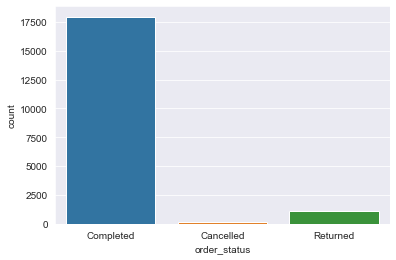

In [33]:
sns.countplot(x=gp_df.order_status)

# Checking for null values

In [7]:
gp_df.isnull().sum()

order_no            0
order_status        0
book_name           2
city                1
payment_method     10
total_item          0
total_weight_gm     0
date                0
time                0
month_year          0
dtype: int64

let us check the null values for the above columns and try to figure out why they might be missing

In [8]:
gp_df[gp_df['book_name'].isnull()]

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
12350,60457,Returned,NaN,Dera Ismail Khan,BankTransfer,0,200.0,2020-11-14,00:00:00,2020-11
16976,67823,Returned,NaN,Karachi,EasyPaisa,0,200.0,2021-01-02,20:31:00,2021-01


In [9]:
gp_df[pd.isnull(gp_df.city)]

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
15266,65221,Completed,"Blockchain, Cryptocurrency And Bitcoin/R ka Ta...",NaN,BankTransfer,6,500.0,2020-12-17,07:18:00,2020-12


In [10]:
gp_df[pd.isnull(gp_df.payment_method)]

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
6,313,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,Lahore,NaN,2,200.0,2019-10-03,19:04:00,2019-10
19070,70795,Completed,Europe Ke Baankey,d i khan,NaN,1,200.0,2021-01-16,20:45:00,2021-01
19087,70819,Completed,Safar e Hajj,Islamabad,NaN,1,200.0,2021-01-16,23:56:00,2021-01
19134,70883,Completed,Fasana Ajaib/Safar e Hajj,"Jauharabad , Distt Khushab",NaN,2,200.0,2021-01-18,12:09:00,2021-01
19154,70921,Completed,Dilli Gadar Se Pehle/Purane Lakhnau Ki Jhalkiy...,mansehra,NaN,6,200.0,2021-01-19,02:33:00,2021-01
19155,70922,Completed,Ajaibaat E Farang/Europe Ke Baankey,mansehra,NaN,3,200.0,2021-01-19,02:39:00,2021-01
19156,70923,Completed,Ajaibaat E Farang/Europe Ke Baankey,mansehra,NaN,3,200.0,2021-01-19,02:39:00,2021-01
19168,70945,Completed,Jauhar E Akhlaq,Karachi,NaN,1,200.0,2021-01-19,20:33:00,2021-01
19176,70956,Completed,Firdaus E Bareen,"Wah Cantt, Taxila, Rawalpindi",NaN,1,200.0,2021-01-20,09:28:00,2021-01


Here **book_name** column has 2 missing values, it might be because they have been **Returned**<br>
**city** has 1 missing value, it may be because user hasn't provided it<br>
similarly, **payment_method** has 10 missing values, it might be because user hasn't provided

# Orders on each day

In [11]:
order_on_date = gp_df.date.value_counts().rename_axis('date').reset_index(name='no_of_orders')
order_on_date.sort_values(by=['date'], inplace=True)

In [12]:
fig = px.line(order_on_date, x='date', y='no_of_orders', markers=True)
fig.show()

In [13]:
gp_df

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
1,308,Completed,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,15:54:00,2019-10
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
3,310,Cancelled,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,16:42:00,2019-10
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,Karachi,Cash on Delivery (COD),1,200.0,2019-10-03,16:44:00,2019-10
...,...,...,...,...,...,...,...,...,...,...
19234,71332,Completed,Linux - An Introduction,Lahore,Cash on delivery,1,200.0,2021-01-25,12:46:00,2021-01
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,Lahore,Cash on delivery,4,200.0,2021-01-25,14:06:00,2021-01
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",Larkana,Cash on delivery,2,500.0,2021-01-25,16:37:00,2021-01
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,"Mailsi, district Vehari",Cash on delivery,10,400.0,2021-01-25,18:01:00,2021-01


Taking look at the "**book_name**" column above, we see that in each order if multiple books are ordered then the **books name are concatenated with a "/" symbol** (for eg. see the 'book_name' column for indexes 2, 19235, 19237...). So to know the number of each books sold, we need to split the individual book name from the "book_name" column.
## Splitting indiviual book names from Orders

In [14]:
gp_df1 = gp_df.assign(book_name=gp_df['book_name'].str.split('/')).explode('book_name')
gp_df1.reset_index(drop=True)

,order_no,order_status,book_name,city,payment_method,total_item,total_weight_gm,date,time,month_year
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,faisalabad,NaN,2,200.0,2019-10-03,15:03:00,2019-10
1,308,Completed,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,15:54:00,2019-10
2,309,Completed,Kaggle for Begginers,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
3,309,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,Hyderabad,Cash on Delivery (COD),2,200.0,2019-10-03,16:09:00,2019-10
4,310,Cancelled,Kaggle for Begginers,Rawalpindi,Cash on Delivery (COD),1,200.0,2019-10-03,16:42:00,2019-10
...,...,...,...,...,...,...,...,...,...,...
33250,71420,Completed,Kaggle for Begginers,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33251,71420,Completed,Artificial Intelligence,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33252,71420,Completed,ایک تھا الگورتھم,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01
33253,71420,Completed,R ka Taaruf,Lahore,Cash on delivery,7,400.0,2021-01-25,20:47:00,2021-01


# • What is the best-selling book?

In [15]:
gp_df1.loc[:, ['book_name', 'order_status']].value_counts()

book_name                               order_status
انٹرنیٹ سے پیسہ کمائیں                  Completed       3020
Python Programming                      Completed       2223
Artificial Intelligence                 Completed       1995
Blockchain, Cryptocurrency And Bitcoin  Completed       1719
Product Management                      Completed       1492
                                                        ... 
Kamyabi Mubarak                         Returned           1
Kamyab Log                              Cancelled          1
Kaleesa                                 Completed          1
Kalam sultan baho                       Completed          1
LABBAIK                                 Returned           1
Length: 2098, dtype: int64

### From the above analysis, we conclude that the book entitled as "ا**نٹرنیٹ سے پیسہ کمائیں**" 
is the highest selling book having a **total of 3020 successful orders**

## Find the top 10 selling books

In [16]:
gp_df2 = gp_df1[['date', 'book_name', 'order_status']]

# Here, keeping only the rows of dataframe gp_df2 having successful orders(i.e completed order) 
# & deleting the other records (i.e Returned and Cancelled)
gp_df2 = gp_df2[(gp_df2.order_status == 'Completed')]
gp_df2.drop(columns=['order_status'], inplace=True)
topbooks = gp_df2.book_name.value_counts()[:10].index.tolist()
topbooks

['انٹرنیٹ سے پیسہ کمائیں',
 'Python Programming',
 'Artificial Intelligence',
 'Blockchain, Cryptocurrency And Bitcoin',
 'Product Management',
 'Justju ka safar-1',
 'ڈیٹا سائنس',
 'مشین لرننگ',
 'Sukkur To Florida',
 '(C++)']

# Sales Trend

## Each day Sale

In [17]:
books_order_on_date = pd.DataFrame(gp_df2.groupby('date')['book_name'].value_counts())
books_order_on_date.rename(columns={'book_name': 'no_of_orders'}, inplace=True)
books_order_on_date.reset_index(inplace= True)
books_order_on_date.sort_values(by='date')
books_order_on_date.head()

,date,book_name,no_of_orders
0,2019-10-03,Bitcoin Blockchain aur Crypto Currency - FREE ...,3
1,2019-10-03,Kaggle for Begginers,3
2,2019-10-03,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2
3,2019-10-03,(C++) ++سی,1
4,2019-10-03,Global Science - Issue 219,1


In [18]:
each_day_sale = books_order_on_date.groupby(['date']).no_of_orders.sum()
each_day_sale.head()

date
2019-10-03    15
2019-11-12    12
2019-11-13     5
2019-11-14     7
2019-11-15     7
Name: no_of_orders, dtype: int64

In [19]:
fig = px.line(x=each_day_sale.index, y=each_day_sale, markers=True)
fig.update_layout(
    title="Each Day Sale",
    xaxis_title="Date",
    yaxis_title="Number of Books Sold")
fig.show()

## Sales record of Book :  انٹرنیٹ سے پیسہ کمائیں 

In [20]:
top1_book_order = books_order_on_date.loc[(books_order_on_date.book_name == topbooks[0]), ['date', 'no_of_orders']]
print("Sales record of Book : ", topbooks[0])
top1_book_order

Sales record of Book :  انٹرنیٹ سے پیسہ کمائیں


,date,no_of_orders
5426,2020-10-21,2
5449,2020-10-22,8
5469,2020-10-23,127
5501,2020-10-24,200
5534,2020-10-25,60
...,...,...
9469,2021-01-21,1
9473,2021-01-22,2
9488,2021-01-23,4
9501,2021-01-24,1


# Sales Trend of Top 10 Books

In [21]:
fig = make_subplots(rows=10, cols=1)
i=0

for book in topbooks:
    top_book_orders = books_order_on_date.loc[(books_order_on_date.book_name == book), ['date', 'no_of_orders']]
#     fig = px.line(top_book_orders, x='date', y='no_of_orders', markers=True)
    fig.add_trace(
        go.Scatter(x=top_book_orders['date'], y=top_book_orders['no_of_orders'], name=book, mode='lines+markers',), 
        row=i+1, col=1)
    
    i = i + 1
    
fig.update_layout(height=1000, width=1000, title_text="Sales Trend => Top 10 Books")    
fig.show()

# Top Selling Cities

## Cleaning city names

In [22]:
len(gp_df.city.unique())

4164

In [23]:
gp_df.city.value_counts().head(30)

Karachi           2332
Lahore            1993
Islamabad          859
Rawalpindi         645
Faisalabad         478
Peshawar           427
Multan             427
Gujranwala         262
karachi            253
Hyderabad          240
Quetta             223
Sialkot            202
Bahawalpur         167
Sargodha           123
lahore             112
Gujrat             102
Sahiwal             97
Abbottabad          95
KARACHI             94
Okara               91
Sheikhupura         84
Mardan              80
LAHORE              79
Sukkur              77
Haripur             77
Chakwal             76
Kasur               63
Attock              62
Vehari              60
Rahim yar khan      60
Name: city, dtype: int64

There are 4163 unique city names.
<pre>Seeing above output, we see multiple entries for a single city.
Let us take <b>karachi</b>, it is written in different ways as:
   <b>Ways       Occurrence</b>
 Karachi           2332
 karachi            253
 KARACHI             94
 ...</pre>

 City column also *contains many names* of **villages, district, tehsil, colony, street.....**<br>
 It has many weird names.
 
 We need to clean multiple entries. First of all lets change city names into lowercase letters.

In [24]:
gp_df['city'] = gp_df['city'].str.lower()
gp_df['city'].nunique()

3599

#### With the help of this list try to clean the cities names.
##### list of pakistani cities obtained from https://gist.github.com/malikbilal1997/4f41d4d153fca7087a8875cac7db8836

In [25]:
pak_cities = ['islamabad', 'ahmed nager chatha', 'ahmadpur east', 'ali khan abad', 'alipur', 'arifwala', 'attock', 'bhera',
              'bhalwal', 'bahawalnagar','bahawalpur', 'bhakkar', 'burewala', 'chillianwala', 'chakwal', 'chichawatni',
              'chiniot', 'chishtian',
              'daska', 'darya khan', 'dera ghazi khan', 'dhaular', 'dina', 'dinga', 'dipalpur', 'faisalabad', 'ferozewala',
              'fateh jhang','ghakhar mandi', 'gojra', 'gujranwala', 'gujrat', 'gujar khan', 'hafizabad', 'haroonabad', 'hasilpur',
              'haveli lakha', 'jatoi',
              'jalalpur', 'jattan', 'jampur', 'jaranwala', 'jhang', 'jhelum', 'kalabagh', 'karor lal esan', 'kasur', 'kamalia', 'kamoke',
              'khanewal',
              'khanpur', 'kharian', 'khushab', 'kot addu', 'jauharabad', 'lahore', 'lalamusa', 'layyah', 'liaquat pur',
              'lodhran', 'malakwal', 'mamoori', 'mailsi', 'mandi bahauddin', 'mian channu', 'mianwali', 'multan', 'murree', 
              'muridke', 'mianwali bangla', 'muzaffargarh', 'narowal', 'nankana sahib', 'okara', 'renala khurd', 'pakpattan', 
              'pattoki', 'pir mahal', 'qaimpur', 'qila didar singh', 'rabwah', 'raiwind', 'rajanpur', 'rahim yar khan',
              'rawalpindi',
              'sadiqabad', 'safdarabad', 'sahiwal', 'sangla hill', 'sarai alamgir', 'sargodha', 'shakargarh', 'sheikhupura',
              'sialkot',
              'sohawa', 'soianwala', 'siranwali', 'talagang', 'taxila', 'toba tek singh', 'vehari', 'wah cantonment', 
              'wazirabad',
              'badin', 'bhirkan', 'rajo khanani', 'chak', 'dadu', 'digri', 'diplo', 'dokri', 'ghotki', 'haala', 'hyderabad',
              'islamkot', 'jacobabad', 'jamshoro', 'jungshahi', 'kandhkot', 'kandiaro', 'karachi', 'kashmore', 'keti bandar',
              'khairpur', 'kotri', 'larkana', 'matiari', 'mehar', 'mirpur khas', 'mithani', 'mithi', 'mehrabpur', 'moro',
              'nagarparkar', 'naudero', 'naushahro feroze', 'naushara', 'nawabshah', 'nazimabad', 'qambar', 'qasimabad', 
              'ranipur', 'ratodero', 'rohri', 'sakrand', 'sanghar', 'shahbandar', 'shahdadkot', 'shahdadpur',
              'shahpur chakar', 'shikarpaur', 'sukkur', 'tangwani', 'tando adam khan', 'tando allahyar',
              'tando muhammad khan', 'thatta', 'umerkot', 'warah', 'abbottabad', 'adezai', 'alpuri', 'akora khattak',
              'ayubia', 'banda daud shah', 'bannu', 'batkhela', 'battagram', 'birote', 'chakdara', 'charsadda', 'chitral',
              'daggar', 'dargai', 'darya khan', 'dera ismail khan', 'doaba', 'dir', 'drosh', 'hangu', 'haripur', 'karak',
              'kohat', 'kulachi', 'lakki marwat', 'latamber', 'madyan', 'mansehra', 'mardan', 'mastuj', 'mingora', 'nowshera',
              'paharpur', 'pabbi', 'peshawar', 'saidu sharif', 'shorkot', 'shewa adda', 'swabi', 'swat', 'tangi', 'tank',
              'thall', 'timergara', 'tordher', 'awaran', 'barkhan', 'chagai', 'dera bugti', 'gwadar', 'harnai', 'jafarabad',
              'jhal magsi', 'kacchi', 'kalat', 'kech', 'kharan', 'khuzdar', 'killa abdullah', 'killa saifullah', 'kohlu',
              'lasbela', 'lehri', 'loralai', 'mastung', 'musakhel', 'nasirabad', 'nushki', 'panjgur', 'pishin valley', 
              'quetta', 'sherani', 'sibi', 'sohbatpur', 'washuk', 'zhob', 'ziarat']


Apply a function on the *city* column to reduce incorrect city names.

In [26]:
def clean_city(city):
    for i in pak_cities:
        if i in str(city):
            return i
    return city

In [27]:
gp_df['city'] = gp_df['city'].apply(clean_city)
gp_df['city'].nunique()

1874

In [28]:
top_cities = gp_df['city'].value_counts().head(10)
top_cities

karachi       3015
lahore        2397
islamabad     1026
rawalpindi     793
faisalabad     577
peshawar       543
multan         495
gujranwala     329
hyderabad      290
sialkot        290
Name: city, dtype: int64

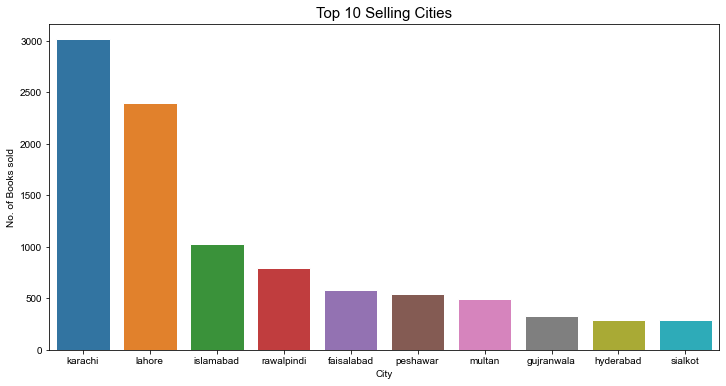

In [29]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Selling Cities", fontsize=15)
sns.set_style("darkgrid")

ax = sns.barplot(x=top_cities.index, y=top_cities)
ax.set(xlabel='City', ylabel='No. of Books sold')
plt.show()

# Correlation between date and time with Order Status

In [30]:
monthly_orders = gp_df.groupby(['month_year', 'order_status'])['order_no'].count().reset_index()
monthly_orders.sample(10)

,month_year,order_status,order_no
17,2020-07,Returned,3
0,2019-10,Cancelled,1
31,2021-01,Returned,199
3,2019-11,Completed,28
16,2020-07,Completed,1240
27,2020-12,Completed,2151
19,2020-08,Completed,2292
30,2021-01,Completed,2474
21,2020-09,Completed,1430
2,2019-11,Cancelled,1


C:\Users\DELL\AppData\Local\Temp/ipykernel_12340/3233778521.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



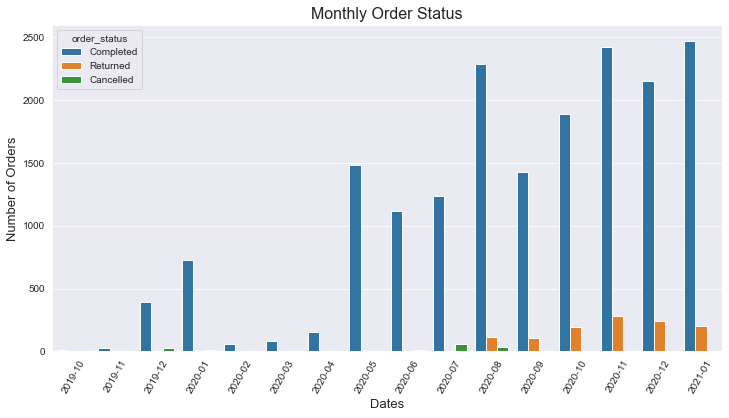

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.set_xticklabels(monthly_orders['month_year'], rotation=60)

ax = sns.barplot(data=monthly_orders, x='month_year', y='order_no', 
                hue='order_status', hue_order=["Completed", "Returned", "Cancelled"])

ax.set_title('Monthly Order Status',fontsize=16)
ax.set_xlabel("Dates",fontsize=13)
ax.set_ylabel("Number of Orders",fontsize=13) 
plt.show()